In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
import seaborn as sns

In [2]:
#load dataset

dataset = pd.read_csv("./test_data/Data_for_UCI_named.csv")

## basic data exploratory process

In [3]:

dataset

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4      stab     stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1    -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2    -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3    -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4    -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  0.023892  unstable  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120 -0.025803    stable  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984 -0.031810    stable  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  0.037789  unstable  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  0.045263  unstable  

[10000 rows x 14 columns]

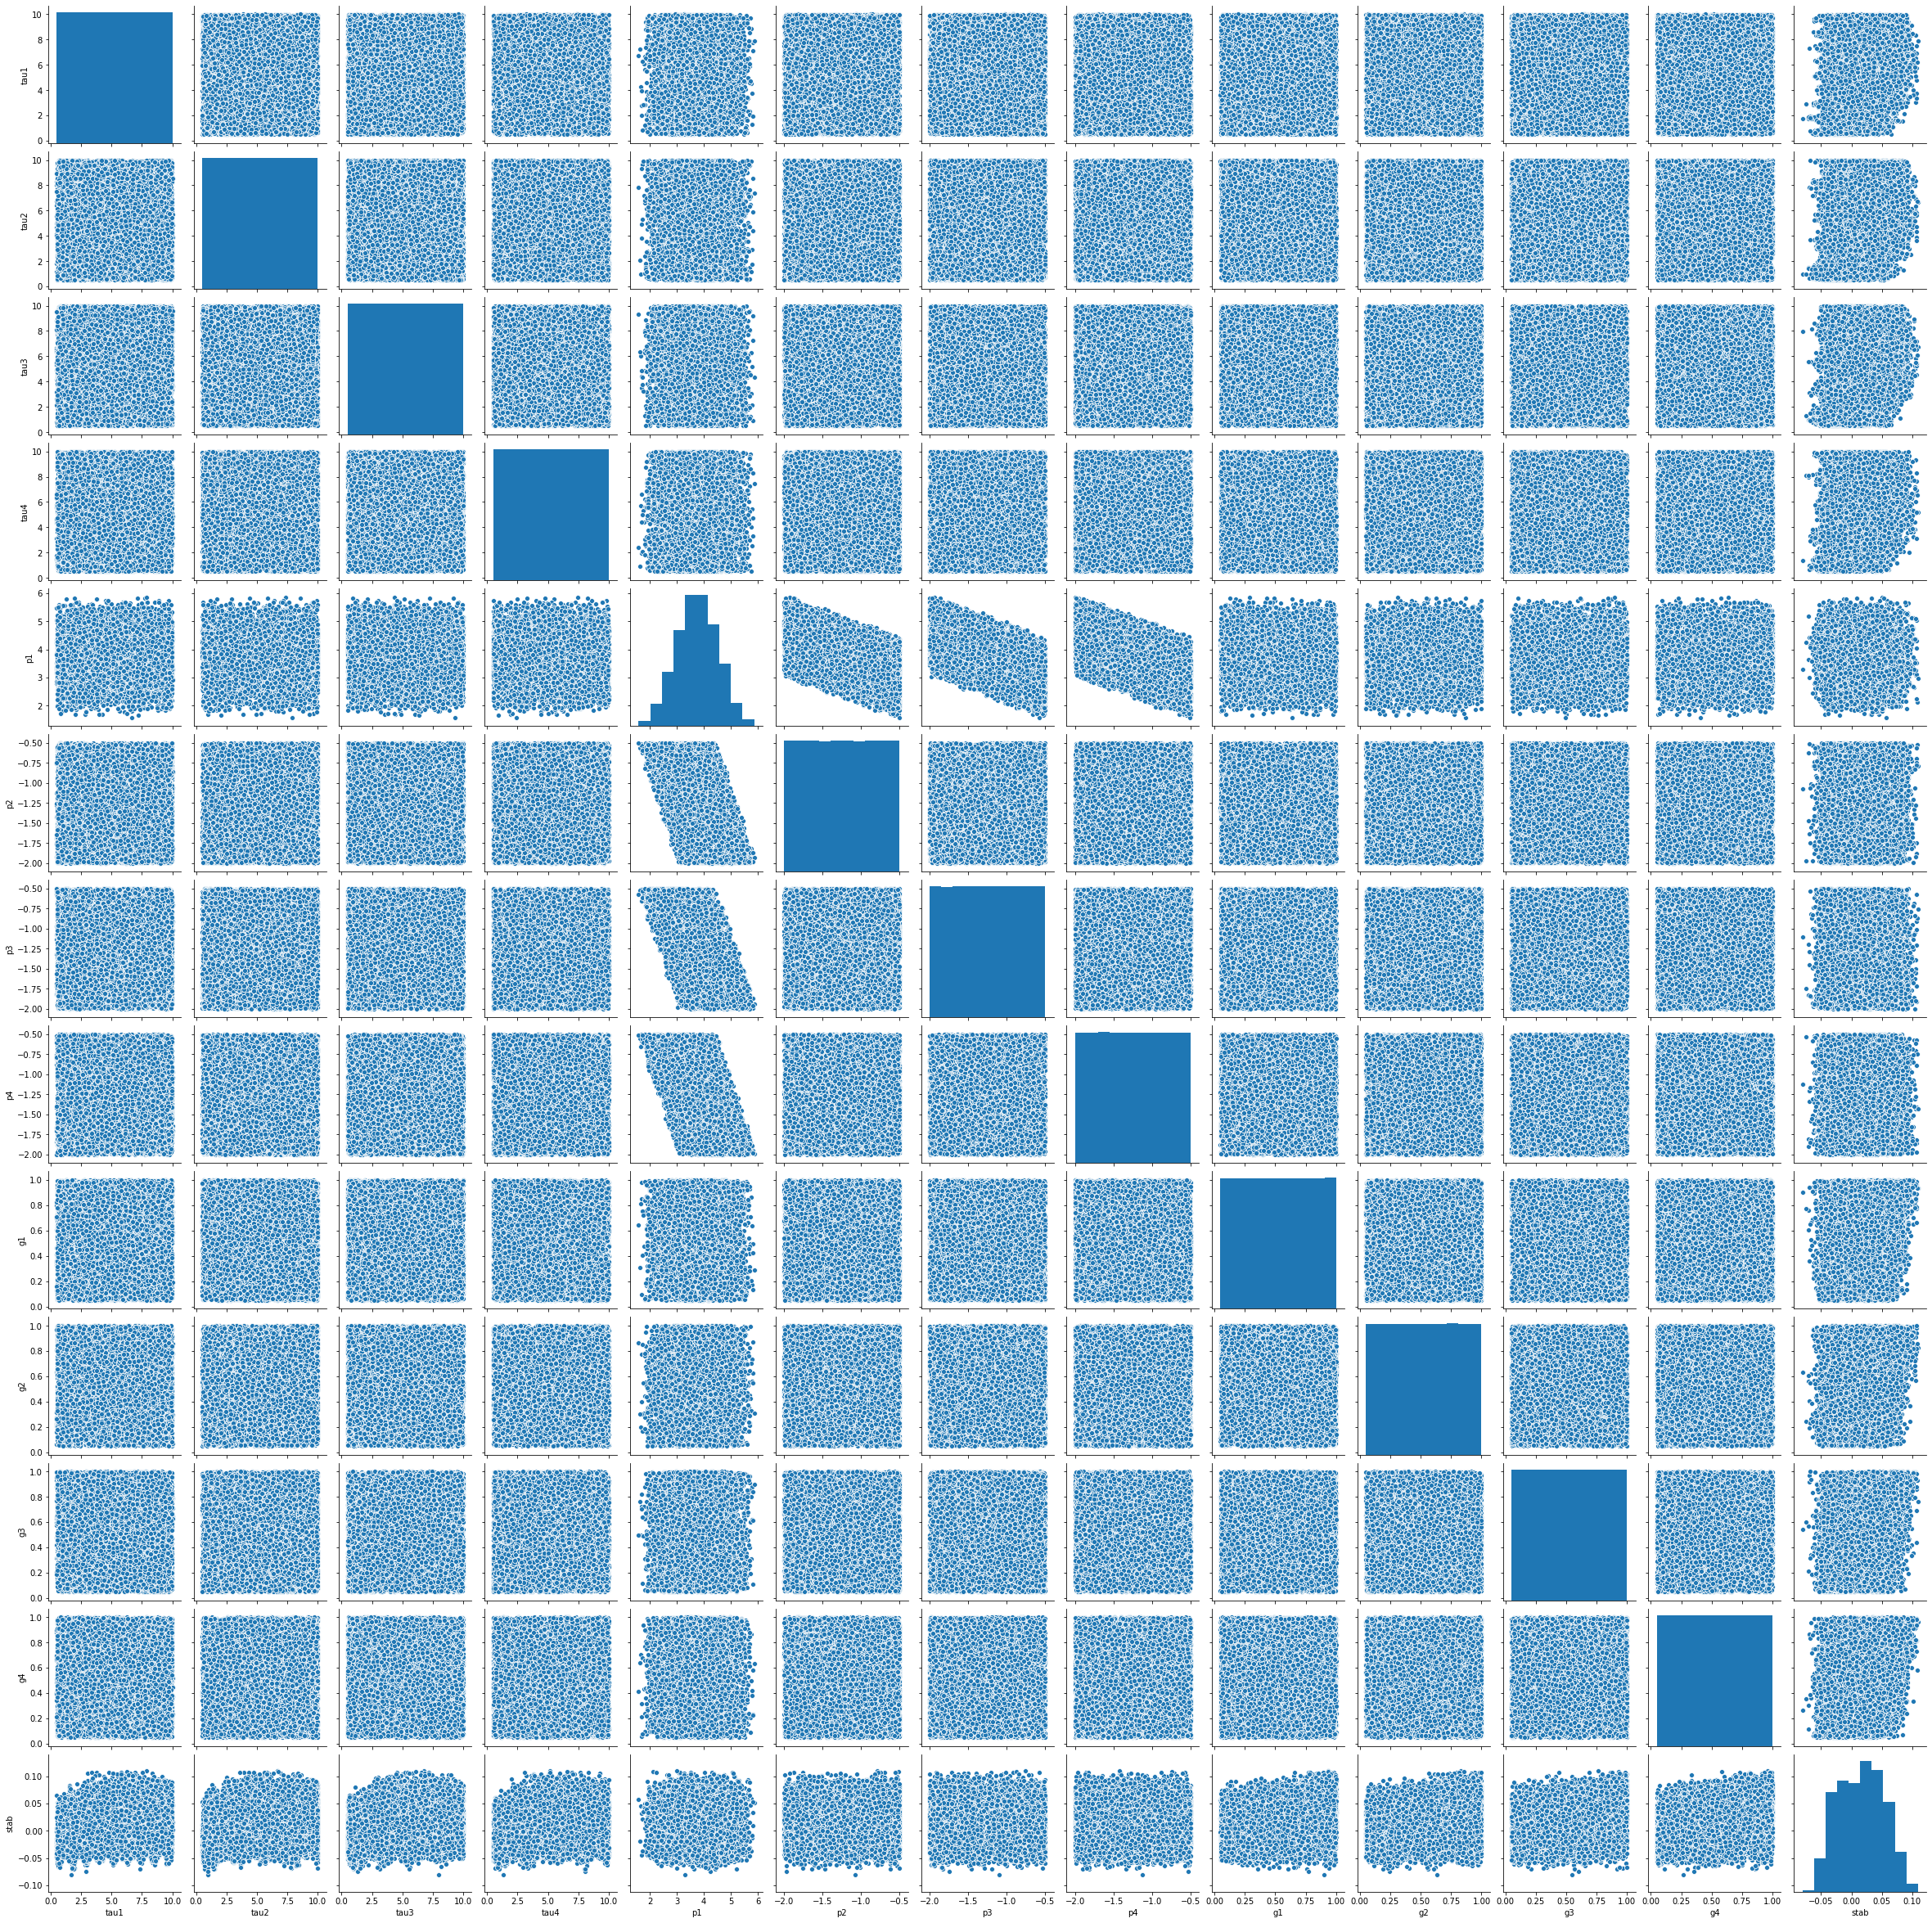

In [4]:
sns.pairplot(dataset)

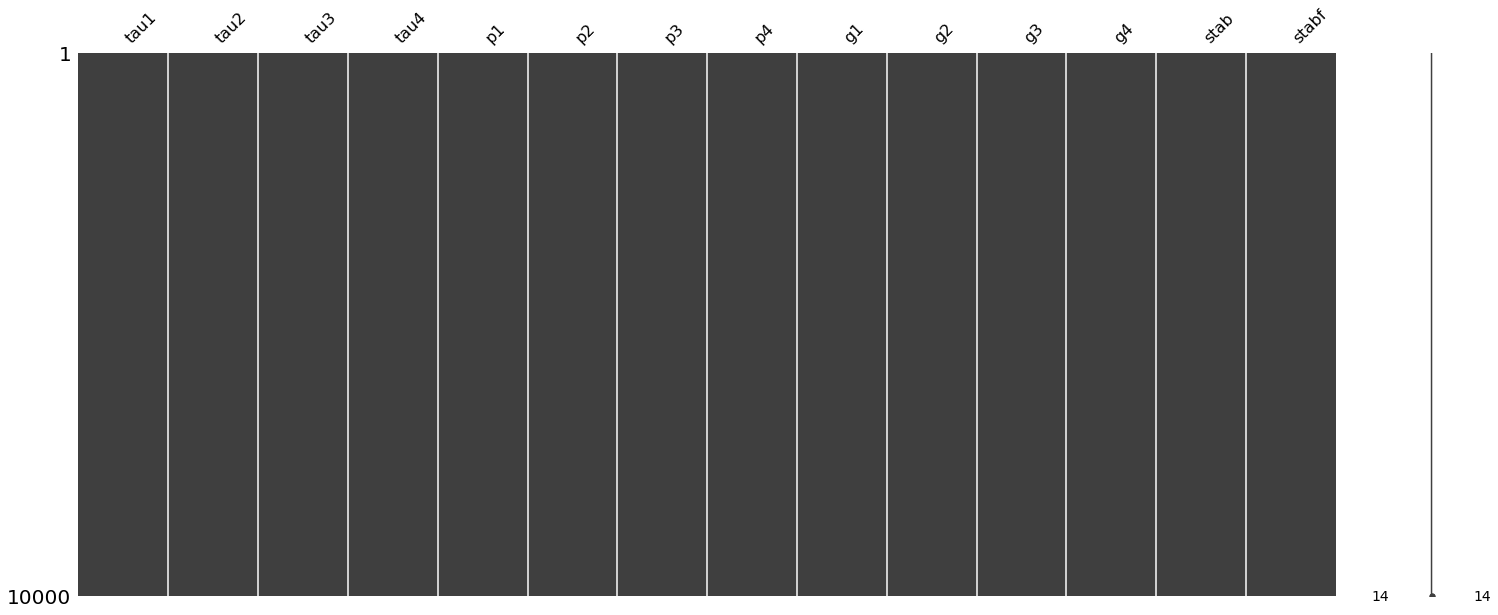

In [5]:
#check for missing data
import missingno as msn
msn.matrix(dataset)

In [6]:
#check statistical distribution of dataset
dataset.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

In [7]:
dataset["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [8]:
dataset.shape

(10000, 14)

## check for dataset assumptions

In [9]:
#As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);

dataset["p1"] == - (dataset["p2"] + dataset["p3"] + dataset["p4"])

0       False
1        True
2        True
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

## dropping unwanted columns

In [10]:
dataset = dataset.drop(columns="stab")

In [11]:
dataset

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4     stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034  unstable  
1    -1.255012  0.413441  0.862414  0.562139  0.781760    stable  
2    -0.920492  0.163041  0.766689  0.839444  0.109853  unstable  
3    -0.997374  0.446209  0.976744  0.929381  0.362718  unstable  
4    -0.554305  0.797110  0.455450  0.656947  0.820923  unstable  
...        ...       ...       ...       ...       ...       ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385  unstable  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120    stable  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984    stable  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391  unstable  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631  unstable  

[10000 rows x 13 columns]

## Data preprocessing

In [12]:
#encoding the categorical variable "stabf"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["stabf"] = le.fit_transform(dataset["stabf"])

In [13]:
dataset

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
...        ...       ...       ...       ...       ...       ...       ...   
9995  2.930406  9.487627  2.376523  6.187797  3.343416 -0.658054 -1.449106   
9996  3.392299  1.274827  2.954947  6.894759  4.349512 -1.663661 -0.952437   
9997  2.364034  2.842030  8.776391  1.008906  4.299976 -1.380719 -0.943884   
9998  9.631511  3.994398  2.757071  7.821347  2.514755 -0.966330 -0.649915   
9999  6.530527  6.781790  4.349695  8.673138  3.492807 -1.390285 -1.532193   

            p4        g1        g2        g3        g4  stabf  
0    -1.723086  0.650456  0.859578  0.887445  0.958034      1  
1    -1.255012  0.413441  0.862414  0.562139  0.781760      0  
2    -0.920492  0.163041  0.766689  0.839444  0.109853      1  
3    -0.997374  0.446209  0.976744  0.929381  0.362718      1  
4    -0.554305  0.797110  0.455450  0.656947  0.820923      1  
...        ...       ...       ...       ...       ...    ...  
9995 -1.236256  0.601709  0.779642  0.813512  0.608385      1  
9996 -1.733414  0.502079  0.567242  0.285880  0.366120      0  
9997 -1.975373  0.487838  0.986505  0.149286  0.145984      0  
9998 -0.898510  0.365246  0.587558  0.889118  0.818391      1  
9999 -0.570329  0.073056  0.505441  0.378761  0.942631      1  

[10000 rows x 13 columns]

In [14]:
#creating train_test_split

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [15]:
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

<p>Inference:
    unsatble = 1
    stable   = 0 
    </p>

In [16]:
#scaling features

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#fit scaler on X_train and y_train
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


In [17]:
y_train

2694    1
5140    1
2568    1
3671    1
7427    1
       ..
2895    0
7813    0
905     1
5192    1
235     0
Name: stabf, Length: 8000, dtype: int32

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

rand_cls = RandomForestClassifier(random_state=1)
extra_cls = ExtraTreesClassifier(random_state=1)

#train both models
rand_cls.fit(X_train, y_train)
extra_cls.fit(X_train, y_train)

ExtraTreesClassifier(random_state=1)

In [19]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#create object of algorithms
Xbo_cls = XGBClassifier(random_state=1, max_depth=3, learning_rate=0.1)
light_cls = LGBMClassifier(random_state=1)

#train both models
Xbo_cls.fit(X_train, y_train)
light_cls.fit(X_train, y_train)

LGBMClassifier(random_state=1)

### computing y_pred for each model

In [20]:
rand_y_pred = rand_cls.predict(X_test)
extra_y_pred = extra_cls.predict(X_test)

#for gradient boosters
Xbo_y_pred = Xbo_cls.predict(X_test)
light_y_pred = light_cls.predict(X_test)

# Computing classification metrics

### first for the ensemble models

In [21]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, classification_report

In [23]:
man_rand_accuracy = accuracy_score(y_test, rand_y_pred)
man_extra_accuracy = accuracy_score(y_test, extra_y_pred)
man_xbo_accuracy = accuracy_score(y_test, Xbo_y_pred)
man_light_accuracy = accuracy_score(y_test, light_y_pred)


print("\nRandom Forest Accuracy: ",man_rand_accuracy, "\n Extra Trees Accuracy: ", man_extra_accuracy,"\n XGBOOST Accuracy: ", man_xbo_accuracy, "\n LightGB Accuracy: ", man_light_accuracy)


Random Forest Accuracy:  0.929 
 Extra Trees Accuracy:  0.928 
 XGBOOST Accuracy:  0.9195 
 LightGB Accuracy:  0.9375


In [24]:
#confusion matric
rand_cm = confusion_matrix(y_test, rand_y_pred)
extra_cm = confusion_matrix(y_test, extra_y_pred)

#boosters
Xbo_cm = confusion_matrix(y_test, Xbo_y_pred)
light_cm = confusion_matrix(y_test, light_y_pred)

#print all confusion matrix

print("Confusion Matrix of ordinary ensemble model \n","Random Forest: \n", rand_cm,"\n", "\n","Extra tree: \n", extra_cm, "\n")
print("Confusion Matrix of boosters \n", "XGBOOST: \n",  Xbo_cm,"\n", "\n","LIGHTGBM\n", light_cm, "\n")

print()

Confusion Matrix of ordinary ensemble model 
 Random Forest: 
 [[ 625   87]
 [  55 1233]] 
 
 Extra tree: 
 [[ 606  106]
 [  38 1250]] 

Confusion Matrix of boosters 
 XGBOOST: 
 [[ 603  109]
 [  52 1236]] 
 
 LIGHTGBM
 [[ 635   77]
 [  48 1240]] 




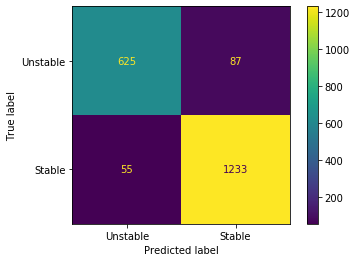

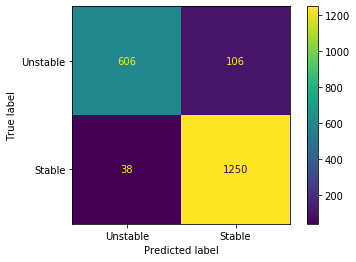

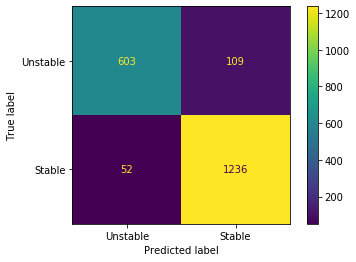

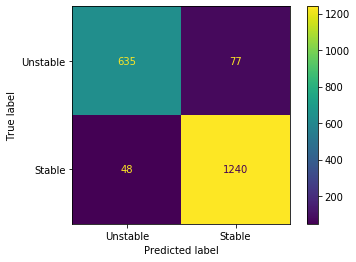

In [25]:
from sklearn.metrics import plot_confusion_matrix



plot_confusion_matrix(rand_cls, X_test, y_test, display_labels=["Unstable", "Stable"])

plot_confusion_matrix(extra_cls, X_test, y_test, display_labels=["Unstable", "Stable"])

plot_confusion_matrix(Xbo_cls, X_test, y_test, display_labels=["Unstable", "Stable"])

plot_confusion_matrix(light_cls, X_test, y_test, display_labels=["Unstable", "Stable"])

In [26]:
#classification report for random forest
rand_report = classification_report(y_test, rand_y_pred)
extra_reort = classification_report(y_test, extra_y_pred, digits=4)
#for boosters
Xbo_report = classification_report(y_test, Xbo_y_pred)
light_report = classification_report(y_test, light_y_pred)

In [27]:
print(rand_report)
print(extra_reort)
print(Xbo_report)
print(light_report)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

              precision    recall  f1-score   support

           0     0.9410    0.8511    0.8938       712
           1     0.9218    0.9705    0.9455      1288

    accuracy                         0.9280      2000
   macro avg     0.9314    0.9108    0.9197      2000
weighted avg     0.9287    0.9280    0.9271      2000

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       712
           1       0.92      0.96      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.92      0.92      0.92      2000

              preci

In [28]:
#computing roc_auc_curve score

rand_auc = roc_auc_score(y_test, rand_y_pred)
extra_auc = roc_auc_score(y_test, extra_y_pred)
Xbo_auc = roc_auc_score(y_test, Xbo_y_pred)
light_auc = roc_auc_score(y_test, light_y_pred)

In [29]:
print("Random Forest ROC_AUC score: " ,rand_auc)
print("Extra tree cls ROC_AUC score:", rand_auc)
print("XGBOOST ROC_AUC score:       " ,rand_auc)
print("LIGHTGBM ROC_AUC score:      " ,rand_auc)

Random Forest ROC_AUC score:  0.917553562705004
Extra tree cls ROC_AUC score: 0.917553562705004
XGBOOST ROC_AUC score:        0.917553562705004
LIGHTGBM ROC_AUC score:       0.917553562705004


Text(0, 0.5, 'True positive rate')

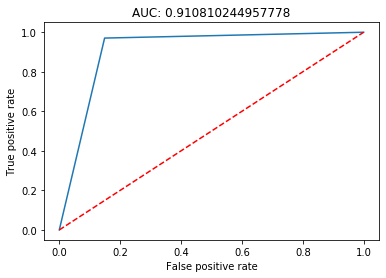

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, extra_y_pred, pos_label=1)

auc = roc_auc_score(y_test, extra_y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

In [31]:
#cross val score for extratree classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(extra_cls, X_train, y_train, cv=5, scoring='f1_macro')
scores.mean()

0.9146867832800964

In [32]:
extra_feature_importance = extra_cls.feature_importances_
importance_df = pd.DataFrame(np.array(X.columns), np.array(extra_feature_importance), columns=["feature_name"])
importance_df

feature_name
0.117397         tau1
0.118445         tau2
0.113169         tau3
0.115466         tau4
0.039507           p1
0.040371           p2
0.040706           p3
0.040579           p4
0.089783           g1
0.093676           g2
0.096883           g3
0.094019           g4

<BarContainer object of 12 artists>

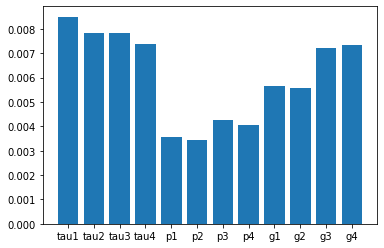

In [33]:
extra_feature_importance = np.std([tree.feature_importances_ for tree in
                                  extra_cls.estimators_], axis=0)

plt.bar(X.columns, extra_feature_importance)

In [34]:
Xbo_feature_importance = Xbo_cls.feature_importances_
Xbo_importance_df = pd.DataFrame(np.array(X.columns), np.array(Xbo_feature_importance), columns=["feature_name"])
Xbo_importance_df

feature_name
0.147953         tau1
0.136673         tau2
0.143265         tau3
0.136926         tau4
0.010606           p1
0.000000           p2
0.000000           p3
0.000000           p4
0.104849           g1
0.101431           g2
0.107922           g3
0.110375           g4

#### carrying out a randomized hyper parameter search on extra tree classifier for optimization 

In [35]:
#creating a parameter grid
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

params = {
    'n_estimators': n_estimators,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


extra_random_search = RandomizedSearchCV(extra_cls, param_distributions=params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1 )


In [38]:
extra_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='accuracy', verbose=1)

In [39]:
randomCV_y_pred = extra_random_search.predict(X_test)

In [40]:
randomCV_report = classification_report(y_test, randomCV_y_pred)

In [42]:
print(randomCV_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       712
           1       0.93      0.96      0.94      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [43]:
confusion_matrix(y_test, randomCV_y_pred)

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

In [44]:
rand_man_extra_accuracy = accuracy_score(y_test, randomCV_y_pred)

In [45]:
rand_man_extra_accuracy

0.927

In [46]:
new_cv_extra = ExtraTreesClassifier(n_estimators= 1000, min_samples_split= 2, min_samples_leaf = 8,max_features = None)

In [47]:
new_cv_extra.fit(X_train, y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=8, n_estimators=1000)

In [48]:
y_new_pred = new_cv_extra.predict(X_test)
accuracy_score(y_test, y_new_pred)

0.928

In [49]:
new_cv_extra.feature_importances_

array([0.13723458, 0.14042484, 0.1336538 , 0.13532187, 0.00372287,
       0.00534095, 0.0053373 , 0.00509728, 0.10270247, 0.108508  ,
       0.11281237, 0.10984366])

<BarContainer object of 12 artists>

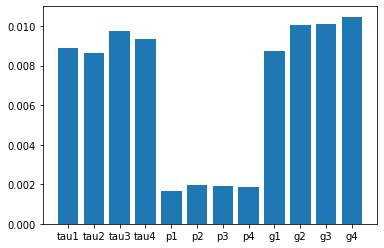

In [50]:
extra_feature_importance_op = np.std([tree.feature_importances_ for tree in
                                  new_cv_extra.estimators_], axis=0)

plt.bar(X.columns, extra_feature_importance_op)

In [51]:
extra_feature_importance_op = new_cv_extra.feature_importances_
importance_df_new = pd.DataFrame(np.array(X.columns), np.array(extra_feature_importance_op), columns=["feature_name"])
importance_df

feature_name
0.117397         tau1
0.118445         tau2
0.113169         tau3
0.115466         tau4
0.039507           p1
0.040371           p2
0.040706           p3
0.040579           p4
0.089783           g1
0.093676           g2
0.096883           g3
0.094019           g4